## Classification: Thresholding

Logistic regression returns a probability. You can use the returned probability "as is" (for example, the probability that the user will click on this ad is 0.00023) or convert the returned probability to a binary value (for example, this email is spam).

A logistic regression model that returns 0.9995 for a particular email message is predicting that it is very likely to be spam. Conversely, another email message with a prediction score of 0.0003 on that same logistic regression model is very likely not spam. However, what about an email message with a prediction score of 0.6? In order to map a logistic regression value to a binary category, you must define a **classification threshold** (also called the **decision threshold**). A value above that threshold indicates "spam"; a value below indicates "not spam." It is tempting to assume that the classification threshold should always be 0.5, but thresholds are problem-dependent, and are therefore values that you must tune.

The following sections take a closer look at metrics you can use to evaluate a classification model's predictions, as well as the impact of changing the classification threshold on these predictions.

## Classification: True vs. False and Positive vs. Negative
In this section, we'll define the primary building blocks of the metrics we'll use to evaluate classification models. But first, a fable:

An Aesop's Fable: The Boy Who Cried Wolf (compressed)

A shepherd boy gets bored tending the town's flock. To have some fun, he cries out, "Wolf!" even though no wolf is in sight. The villagers run to protect the flock, but then get really mad when they realize the boy was playing a joke on them.

[Iterate previous paragraph N times.]

One night, the shepherd boy sees a real wolf approaching the flock and calls out, "Wolf!" The villagers refuse to be fooled again and stay in their houses. The hungry wolf turns the flock into lamb chops. The town goes hungry. Panic ensues.

Let's make the following definitions:

"Wolf" is a positive class.
"No wolf" is a negative class.
We can summarize our "wolf-prediction" model using a 2x2 confusion matrix that depicts all four possible outcomes:

True Positive (TP):
 * Reality: A wolf threatened.
 * Shepherd said: "Wolf."
 * Outcome: Shepherd is a hero.
False Positive (FP):
 * Reality: No wolf threatened.
 * Shepherd said: "Wolf."
 * Outcome: Villagers are angry at shepherd for waking them up.
False Negative (FN):
 * Reality: A wolf threatened.
 * Shepherd said: "No wolf."
 * Outcome: The wolf ate all the sheep.
True Negative (TN):
 * Reality: No wolf threatened.
 * Shepherd said: "No wolf."
 * Outcome: Everyone is fine.
A **true positive** is an outcome where the model correctly predicts the positive class. Similarly, a true negative is an outcome where the model correctly predicts the negative class.

A **false positive** is an outcome where the model incorrectly predicts the positive class. And a false negative is an outcome where the model incorrectly predicts the negative class.

In the following sections, we'll look at how to evaluate classification models using metrics derived from these four outcomes.


## Classification: Accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

Accuracy = Number of correct predictions/total number of predictions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follows:

Accuracy = (TP + TN) / (TP + TN + FP + FN) 

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.


## Classification: Precision and Recall

Precision
Precision attempts to answer the following question:

What proportion of positive identifications was actually correct?

Precision is defined as follows: 
    Precision = TP / (TP + FP)

Note: A model that produces no false positives has a precision of 1.0.

Recall
Recall attempts to answer the following question:

What proportion of actual positives was identified correctly?

Mathematically, recall is defined as follows:
    Recall = TP /(TP + FN) 


## Classification: ROC and AUC

ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

    TPR = TP /(TP + FN)

False Positive Rate (FPR) is defined as follows:

    FPR = FP /(FP + TN) 
    
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

Plot(FP Rate, TP Rate) 

AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

AUC is desirable for the following two reasons:

AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification threshold is chosen.
However, both these reasons come with caveats, which may limit the usefulness of AUC in certain use cases:

Scale invariance is not always desirable. For example, sometimes we really do need well calibrated probability outputs, and AUC won’t tell us about that.

Classification-threshold invariance is not always desirable. In cases where there are wide disparities in the cost of false negatives vs. false positives, it may be critical to minimize one type of classification error. For example, when doing email spam detection, you likely want to prioritize minimizing false positives (even if that results in a significant increase of false negatives). AUC isn't a useful metric for this type of optimization.


## Classification: Prediction Bias

Logistic regression predictions should be unbiased. That is:

"average of predictions" should ≈ "average of observations"
Prediction bias is a quantity that measures how far apart those two averages are. That is:

Note: "Prediction bias" is a different quantity than bias (the b in wx + b).
A significant nonzero prediction bias tells you there is a bug somewhere in your model, as it indicates that the model is wrong about how frequently positive labels occur.

For example, let's say we know that on average, 1% of all emails are spam. If we don't know anything at all about a given email, we should predict that it's 1% likely to be spam. Similarly, a good spam model should predict on average that emails are 1% likely to be spam. (In other words, if we average the predicted likelihoods of each individual email being spam, the result should be 1%.) If instead, the model's average prediction is 20% likelihood of being spam, we can conclude that it exhibits prediction bias.

Possible root causes of prediction bias are:

   * Incomplete feature set
   * Noisy data set
   * Buggy pipeline
   * Biased training sample
   * Overly strong regularization
   
You might be tempted to correct prediction bias by post-processing the learned model—that is, by adding a calibration layer that adjusts your model's output to reduce the prediction bias. For example, if your model has +3% bias, you could add a calibration layer that lowers the mean prediction by 3%. However, adding a calibration layer is a bad idea for the following reasons:

 * You're fixing the symptom rather than the cause.
 * You've built a more brittle system that you must now keep up to date.
 
If possible, avoid calibration layers. Projects that use calibration layers tend to become reliant on them—using calibration layers to fix all their model's sins. Ultimately, maintaining the calibration layers can become a nightmare.

Note: A good model will usually have near-zero bias. That said, a low prediction bias does not prove that your model is good. A really terrible model could have a zero prediction bias. For example, a model that just predicts the mean value for all examples would be a bad model, despite having zero bias.

#### Bucketing and Prediction Bias

Logistic regression predicts a value between 0 and 1. However, all labeled examples are either exactly 0 (meaning, for example, "not spam") or exactly 1 (meaning, for example, "spam"). Therefore, when examining prediction bias, you cannot accurately determine the prediction bias based on only one example; you must examine the prediction bias on a "bucket" of examples. That is, prediction bias for logistic regression only makes sense when grouping enough examples together to be able to compare a predicted value (for example, 0.392) to observed values (for example, 0.394).

You can form buckets in the following ways:

  * Linearly breaking up the target predictions.
  * Forming quantiles.
Consider the following calibration plot from a particular model. Each dot represents a bucket of 1,000 values. The axes have the following meanings:

  * The x-axis represents the average of values the model predicted for that bucket.
  * The y-axis represents the actual average of values in the data set for that bucket.
Both axes are logarithmic scales.

Calibration scatter plot
Prediction
Label
Figure 8. Prediction bias curve (logarithmic scales)

Why are the predictions so poor for only part of the model? Here are a few possibilities:

  * The training set doesn't adequately represent certain subsets of the data space.
  * Some subsets of the data set are noisier than others.
  * The model is overly regularized. (Consider reducing the value of lambda.)

## Logistic Regression

**Learning Objectives:**
  * Reframe the median house value predictor (from the preceding exercises) as a binary classification model
  * Compare the effectiveness of logisitic regression vs linear regression for a binary classification problem

As in the prior exercises, we're working with the [California housing data set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description), but this time we will turn it into a binary classification problem by predicting whether a city block is a high-cost city block. We'll also revert to the default features, for now.

## Frame the Problem as Binary Classification

The target of our dataset is `median_house_value` which is a numeric (continuous-valued) feature. We can create a boolean label by applying a threshold to this continuous value.

Given features describing a city block, we wish to predict if it is a high-cost city block. To prepare the targets for train and eval data, we define a classification threshold of the 75%-ile for median house value (a value of approximately 265000). All house values above the threshold are labeled `1`, and all others are labeled `0`.

In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

C:\Users\cfeng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Note how the code below is slightly different from the previous exercises. Instead of using `median_house_value` as target, we create a new binary target, `median_house_value_is_high`.

In [2]:
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = california_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income"]]
    processed_features = selected_features.copy()
    # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
        california_housing_dataframe["total_rooms"] /
        california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    # Create a boolean categorical feature representing whether the
    # median_house_value is above a set threshold.
    output_targets["median_house_value_is_high"] = (
        california_housing_dataframe["median_house_value"] > 265000).astype(float)
    return output_targets

In [3]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.5,28.6,2643.0,540.5,1427.3,501.7,3.9,2.0
std,2.1,2.0,12.6,2186.9,424.8,1159.7,386.7,1.9,1.1
min,32.5,-124.3,1.0,2.0,1.0,6.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1466.8,299.0,792.0,282.0,2.6,1.5
50%,34.2,-118.5,29.0,2126.0,434.0,1168.0,409.0,3.5,1.9
75%,37.7,-118.0,37.0,3139.0,648.0,1718.0,606.0,4.8,2.3
max,41.9,-114.3,52.0,37937.0,6445.0,35682.0,6082.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.7,-119.6,28.5,2645.3,536.9,1435.1,500.0,3.9,2.0
std,2.1,2.0,12.6,2163.4,413.4,1119.0,379.3,1.9,1.3
min,32.5,-124.3,2.0,12.0,3.0,3.0,4.0,0.5,0.1
25%,33.9,-121.8,18.0,1445.0,292.8,785.8,279.0,2.6,1.5
50%,34.3,-118.5,28.0,2131.0,432.0,1165.0,408.0,3.6,1.9
75%,37.7,-118.0,37.0,3177.2,650.0,1733.2,605.0,4.7,2.3
max,42.0,-114.6,52.0,30405.0,4957.0,13251.0,4616.0,15.0,52.0


Training targets summary:


,median_house_value_is_high
count,12000.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


Validation targets summary:


,median_house_value_is_high
count,5000.0
mean,0.3
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,1.0
max,1.0


## How Would Linear Regression Fare?
To see why logistic regression is effective, let us first train a naive model that uses linear regression. This model will use labels with values in the set `{0, 1}` and will try to predict a continuous value that is as close as possible to `0` or `1`. Furthermore, we wish to interpret the output as a probability, so it would be ideal if the output will be within the range `(0, 1)`. We would then apply a threshold of `0.5` to determine the label.

Run the cells below to train the linear regression model using [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearRegressor).

In [4]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
        input_features: The names of the numerical input features to use.
    Returns:
        A set of feature columns
      """
    return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [5]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                            
 
    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)
    
    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [6]:
def train_linear_regressor_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model.
  
    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.
  
    Args:
        learning_rate: A `float`, the learning rate.
        steps: A non-zero `int`, the total number of training steps. A training step
        consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        training_examples: A `DataFrame` containing one or more columns from
          `california_housing_dataframe` to use as input features for training.
        training_targets: A `DataFrame` containing exactly one column from
          `california_housing_dataframe` to use as target for training.
        validation_examples: A `DataFrame` containing one or more columns from
          `california_housing_dataframe` to use as input features for validation.
        validation_targets: A `DataFrame` containing exactly one column from
          `california_housing_dataframe` to use as target for validation.
      
    Returns:
        A `LinearRegressor` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    linear_regressor = tf.estimator.LinearRegressor(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer
    )
    
    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE (on training data):")
    training_rmse = []
    validation_rmse = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_regressor.train(
        input_fn=training_input_fn,
            steps=steps_per_period
        )
    
        # Take a break and compute predictions.
        training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
        validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
        validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
        # Compute training and validation loss.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_predictions, training_targets))
        validation_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(validation_predictions, validation_targets))
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        validation_rmse.append(validation_root_mean_squared_error)
    print("Model training finished.")
  
    # Output a graph of loss metrics over periods.
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.tight_layout()
    plt.plot(training_rmse, label="training")
    plt.plot(validation_rmse, label="validation")
    plt.legend()

    return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 0.45
  period 01 : 0.45
  period 02 : 0.45
  period 03 : 0.45
  period 04 : 0.44
  period 05 : 0.44
  period 06 : 0.45
  period 07 : 0.45
  period 08 : 0.47
  period 09 : 0.44
Model training finished.


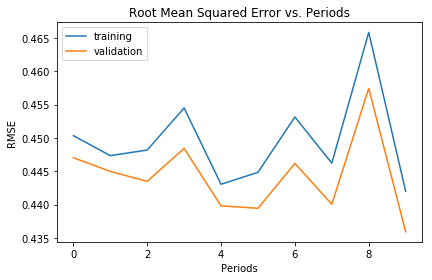

In [7]:
linear_regressor = train_linear_regressor_model(
    learning_rate=0.000001,
    steps=200,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

## Task 1: Can We Calculate LogLoss for These Predictions?

**Examine the predictions and decide whether or not we can use them to calculate LogLoss.**

`LinearRegressor` uses the L2 loss, which doesn't do a great job at penalizing misclassifications when the output is interpreted as a probability.  For example, there should be a huge difference whether a negative example is classified as positive with a probability of 0.9 vs 0.9999, but L2 loss doesn't strongly differentiate these cases.

In contrast, `LogLoss` penalizes these "confidence errors" much more heavily.  Remember, `LogLoss` is defined as:

$$Log Loss = \sum_{(x,y)\in D} -y \cdot log(y_{pred}) - (1 - y) \cdot log(1 - y_{pred})$$


But first, we'll need to obtain the prediction values. We could use `LinearRegressor.predict` to obtain these.

Given the predictions and that targets, can we calculate `LogLoss`?

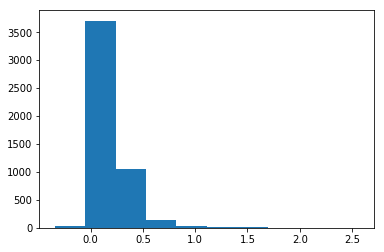

In [8]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                  validation_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)

validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

_ = plt.hist(validation_predictions)

## Task 2: Train a Logistic Regression Model and Calculate LogLoss on the Validation Set

To use logistic regression, simply use [LinearClassifier](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearClassifier) instead of `LinearRegressor`. Complete the code below.

**NOTE**: When running `train()` and `predict()` on a `LinearClassifier` model, you can access the real-valued predicted probabilities via the `"probabilities"` key in the returned dict—e.g., `predictions["probabilities"]`. Sklearn's [log_loss](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) function is handy for calculating LogLoss using these probabilities.

In [9]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear classification model.
  
    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.
  
    Args:
        learning_rate: A `float`, the learning rate.
        steps: A non-zero `int`, the total number of training steps. A training step
          consists of a forward and backward pass using a single batch.
        batch_size: A non-zero `int`, the batch size.
        training_examples: A `DataFrame` containing one or more columns from
          `california_housing_dataframe` to use as input features for training.
        training_targets: A `DataFrame` containing exactly one column from
          `california_housing_dataframe` to use as target for training.
        validation_examples: A `DataFrame` containing one or more columns from
          `california_housing_dataframe` to use as input features for validation.
        validation_targets: A `DataFrame` containing exactly one column from
          `california_housing_dataframe` to use as target for validation.
      
    Returns:
        A `LinearClassifier` object trained on the training data.
    """

    periods = 10
    steps_per_period = steps / periods
  
    # Create a linear classifier object.
    my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
    
    ### linear_classifier = # YOUR CODE HERE: Construct the linear classifier.
    linear_classifier = tf.estimator.LinearClassifier(
        feature_columns=construct_feature_columns(training_examples),
        optimizer=my_optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value_is_high"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value_is_high"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value_is_high"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
  
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.    
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])
    
        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])
    
        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, training_log_loss))
        # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
  
    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return linear_classifier



Training model...
LogLoss (on training data):
  period 00 : 0.59
  period 01 : 0.59
  period 02 : 0.57
  period 03 : 0.55
  period 04 : 0.54
  period 05 : 0.54
  period 06 : 0.54
  period 07 : 0.53
  period 08 : 0.54
  period 09 : 0.53
Model training finished.


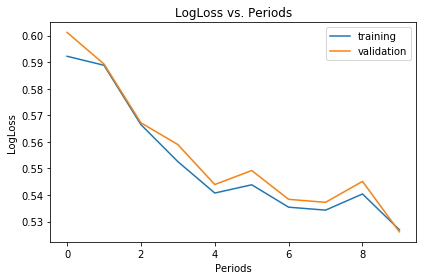

In [10]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000005,
    steps=500,
    batch_size=20,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

## Task 3: Calculate Accuracy and plot a ROC Curve for the Validation Set

A few of the metrics useful for classification are the model [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification), the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and the area under the ROC curve (AUC). We'll examine these metrics.

`LinearClassifier.evaluate` calculates useful metrics like accuracy and AUC.

In [11]:
evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

AUC on the validation set: 0.74
Accuracy on the validation set: 0.76


You may use class probabilities, such as those calculated by `LinearClassifier.predict`,
and Sklearn's [roc_curve](http://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics) to
obtain the true positive and false positive rates needed to plot a ROC curve.

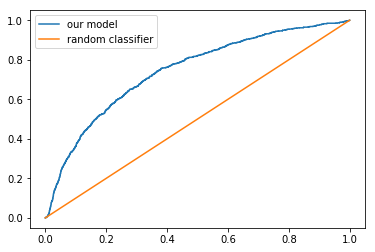

In [12]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class.
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

**See if you can tune the learning settings of the model trained at Task 2 to improve AUC.**

Often times, certain metrics improve at the detriment of others, and you'll need to find the settings that achieve a good compromise.

**Verify if all metrics improve at the same time.**

Training model...
LogLoss (on training data):
  period 00 : 0.63
  period 01 : 0.66
  period 02 : 0.67
  period 03 : 0.68
  period 04 : 0.69
  period 05 : 0.70
  period 06 : 0.71
  period 07 : 0.70
  period 08 : 0.70
  period 09 : 0.70
Model training finished.
AUC on the validation set: 0.81
Accuracy on the validation set: 0.70


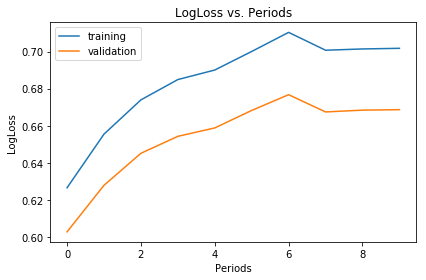

In [13]:
# TUNE THE SETTINGS BELOW TO IMPROVE AUC
linear_classifier = train_linear_classifier_model(
    learning_rate=0.0003,
    steps=5000,
    batch_size=200,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])

One possible solution that works is to just train for longer, as long as we don't overfit.

We can do this by increasing the number the steps, the batch size, or both.

All metrics improve at the same time, so our loss metric is a good proxy for both AUC and accuracy.

Notice how it takes many, many more iterations just to squeeze a few more units of AUC. This commonly happens. But often even this small gain is worth the costs.

Training model...
LogLoss (on training data):
  period 00 : 0.50
  period 01 : 0.48
  period 02 : 0.48
  period 03 : 0.47
  period 04 : 0.47
  period 05 : 0.47
  period 06 : 0.47
  period 07 : 0.47
  period 08 : 0.47
  period 09 : 0.47
Model training finished.
AUC on the validation set: 0.82
Accuracy on the validation set: 0.79


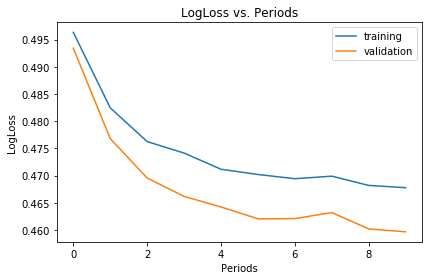

In [14]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.000003,
    steps=20000,
    batch_size=500,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)

print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])